In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

The objective of this project is to predict the price of the houses based on the various features such as size, number of bedrooms, age of the house and proximity to downtown. The aim of this model is to assist real states in estimating house prices more accurately.

1. Data exploration and visualization

The data was loaded into the pandas dataframe for inspection and preprocessing.

In [2]:
df = pd.read_csv('datasets_house_prices.csv')
print(df.head())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (sqft)                    1000 non-null   int64  
 1   Bedrooms                       1000 non-null   int64  
 2   Age                            1000 non-null   int64  
 3   Proximity to Downtown (miles)  1000 non-null   float64
 4   Price                          1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB
None


In [4]:
print(df.describe())

       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2.000000    22.000000                       8.475528   
50%    2430.500000     3.000000    47.000000                      15.239628   
75%    3254.250000     4.000000    74.000000                      22.765188   
max    3997.000000     5.000000    99.000000                      29.935715   

              Price  
count  1.000000e+03  
mean   7.190532e+05  
std    2.789818e+05  
min    2.159455e+05  
25%    4.789045e+05  
50%    7.128781e+05  
75%    9.680664e+05  
max    1.212350e+06  


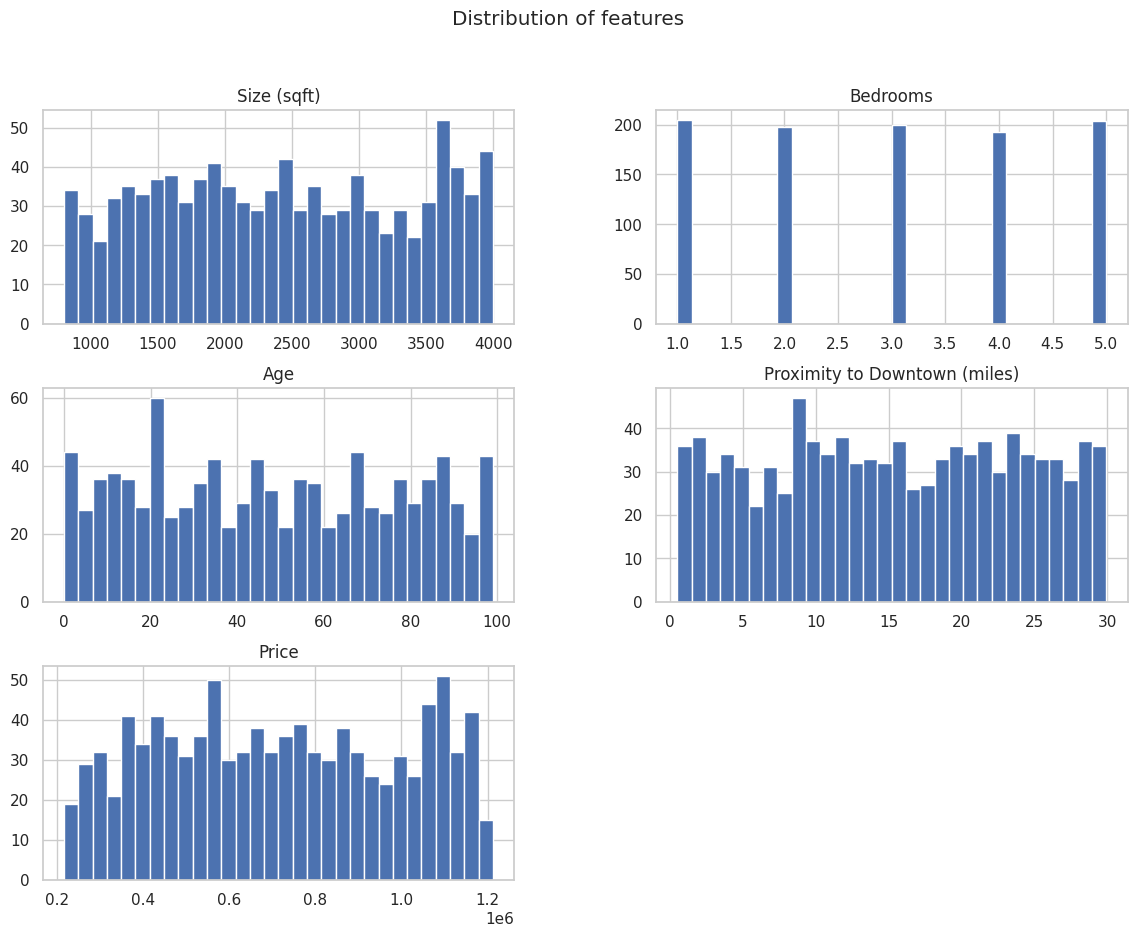

In [6]:
sns.set(style="whitegrid")

df.hist(bins = 30, figsize = (14, 10))
plt.suptitle('Distribution of features')
plt.show()

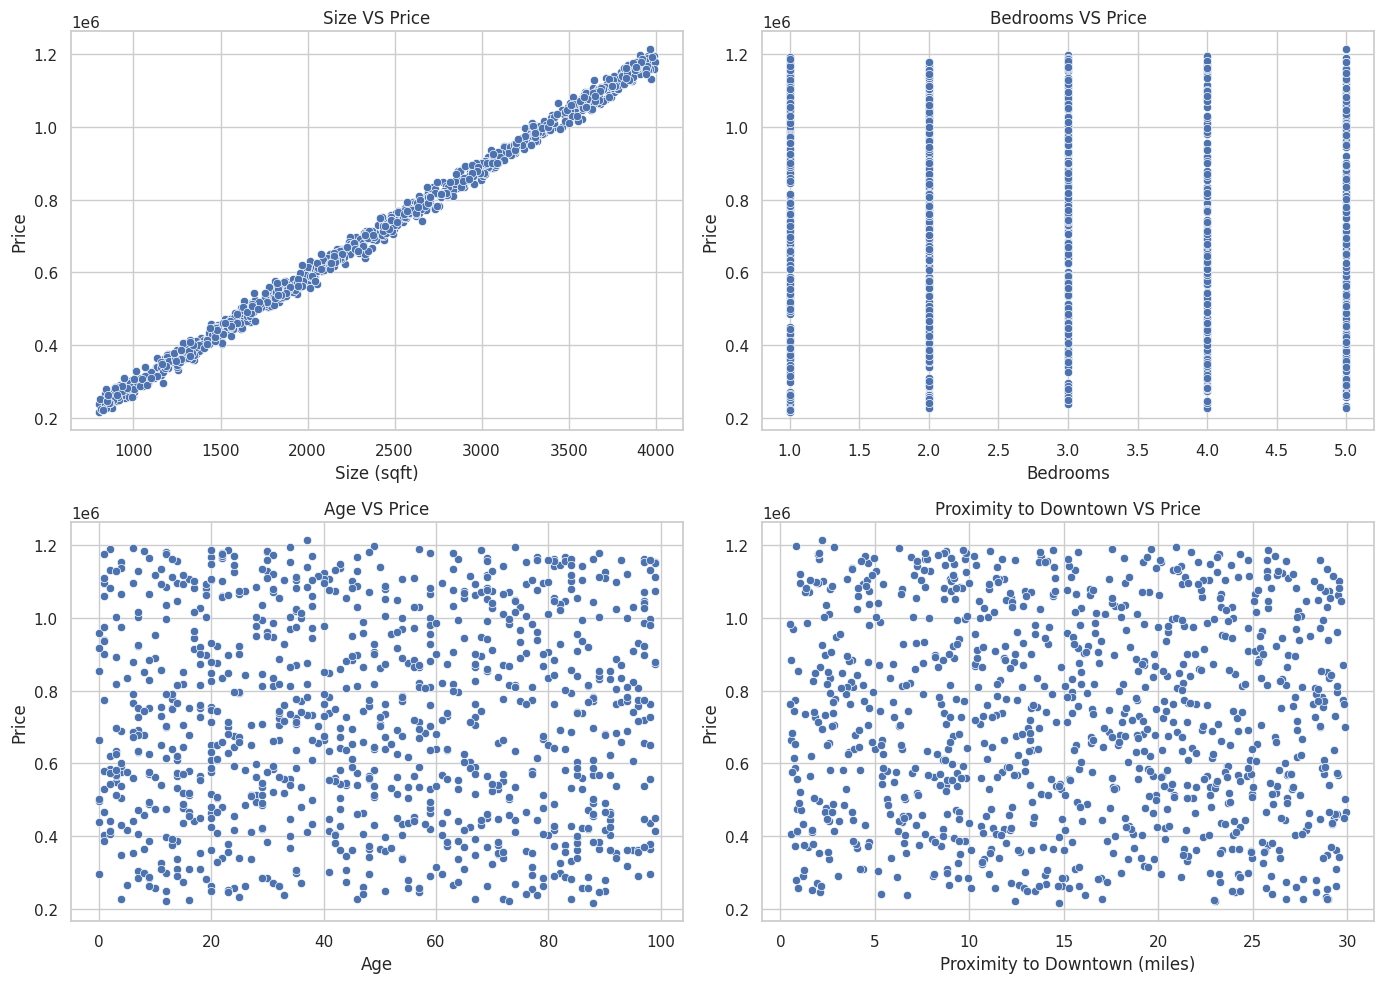

In [14]:
plt.figure(figsize =(14, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x = 'Size (sqft)', y = 'Price', data = df)
plt.title('Size VS Price')

plt.subplot(2, 2, 2)
sns.scatterplot(x = 'Bedrooms', y = 'Price', data = df)
plt.title('Bedrooms VS Price')

plt.subplot(2, 2, 3)
sns.scatterplot(x = 'Age', y = 'Price', data = df)
plt.title('Age VS Price')

plt.subplot(2, 2, 4)
sns.scatterplot(x = 'Proximity to Downtown (miles)', y = 'Price', data = df)
plt.title('Proximity to Downtown VS Price')

plt.tight_layout()
plt.show()

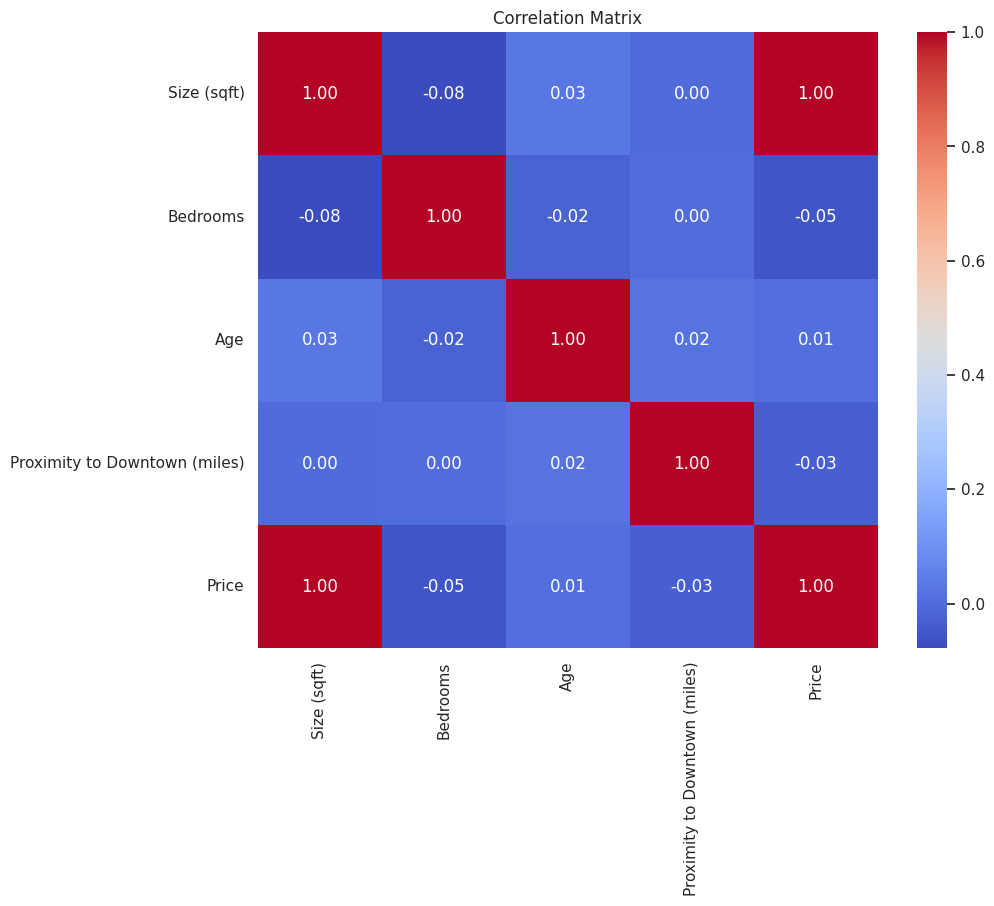

In [16]:
correlation_matrix = df.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

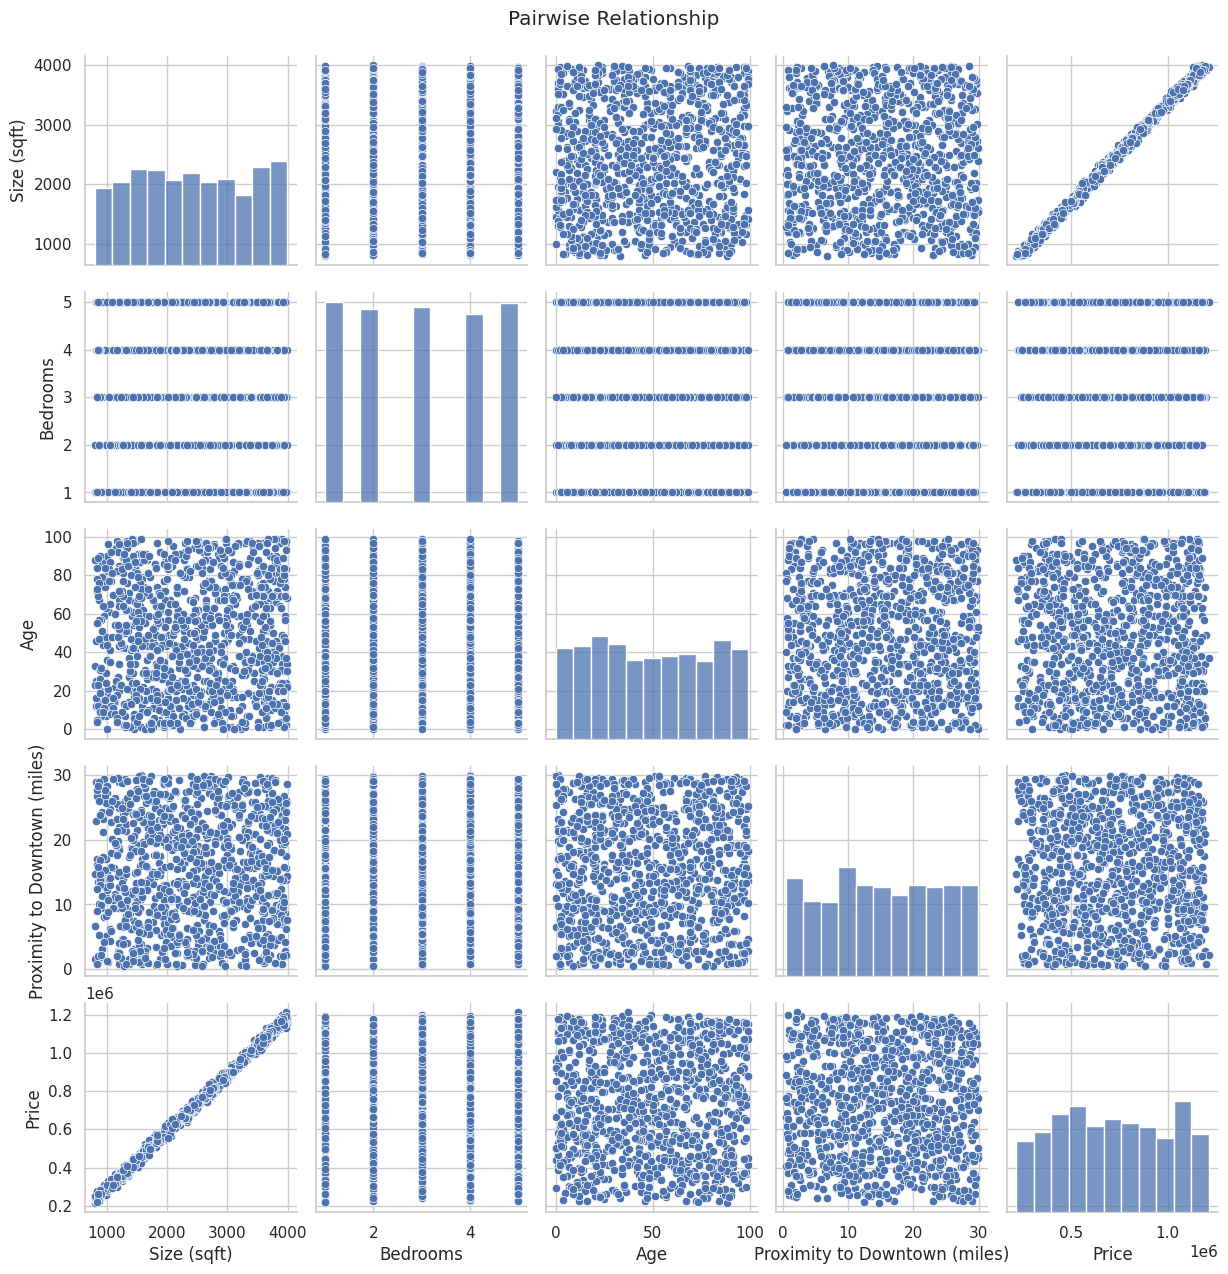

In [17]:
sns.pairplot(df, vars = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)', 'Price'])
plt.suptitle('Pairwise Relationship', y = 1.02)
plt.show()

2. Data preprocessing

The missing values are processed to clean the data that will be used.

In [20]:
print(df.isnull().sum())
df = df.dropna()

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


To ensure all features were on a similar scale, the normalization was applied to the numerical features.

In [26]:
scaler = StandardScaler()
df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']] = scaler.fit_transform(df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']])

3. Model Development

To split the data, I used the train and test split with 70/30 ratio to evaluate model performance.

In [31]:
features = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']
x = df[features]
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

4. Model Evaluation

Recursive Feature Elimination (RFE) was used to identify the most significant features.

In [37]:
rfe = RFE(model, n_features_to_select = 3)
rfe = rfe.fit(x_train, y_train)

print('Feature Ranking:', rfe.ranking_)

selected_features = [features[i] for i in range(len(features)) if rfe.support_[i]]
print('Selected Features:', selected_features)

Feature Ranking: [1 1 2 1]
Selected Features: ['Size (sqft)', 'Bedrooms', 'Proximity to Downtown (miles)']


The linear regression model was trained using the training set.

The model was evaluated using Mean Squared Error (MSE), R-squared, and Adjusted R-squared.

In [38]:
model = LinearRegression()

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

n = x_test.shape[0]
p = x_test.shape[1]
adjust_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared Score: {r2}')
print(f'Adjusted R-Sqaure: {adjust_r2}')

print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 100214724.63128746
R-Squared Score: 0.9986314443568995
Adjusted R-Sqaure: 0.9986128876702134
Coefficient: [278975.28593843   6804.51900082  -6082.93925798  -8459.85395639]
Intercept: 718607.7680535176


A scatter plot was created to visualize the relationship between predicted and actual prices.

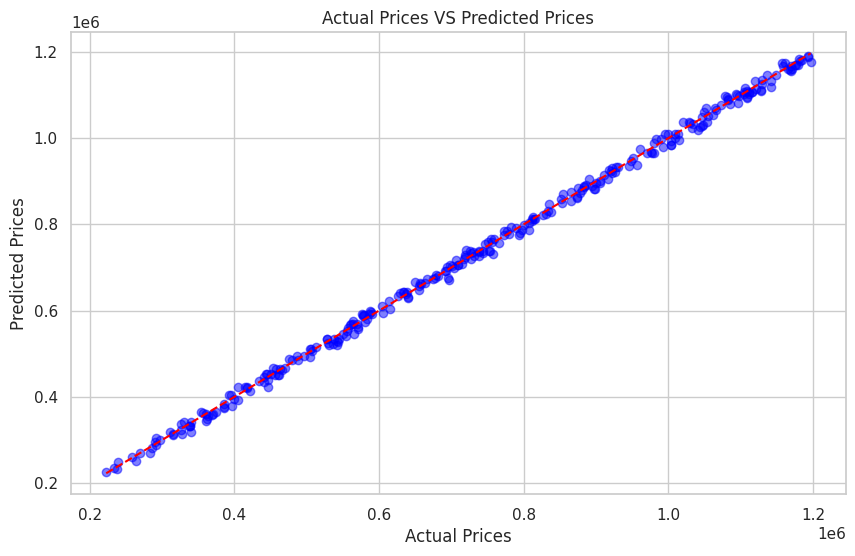

In [40]:
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_predict, color = 'blue', alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices VS Predicted Prices')
plt.show()